In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data_df = pd.read_csv('test.csv')
target_encoder = LabelBinarizer()
target_encoder.fit(data_df['Activity'])
transformed_target = target_encoder.transform(data_df['Activity'])
ohe_target = pd.DataFrame(transformed_target)
data_df = data_df.drop(['Activity'],axis=1)

In [33]:
ohe_target

,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
2942,0,0,0,0,0,1
2943,0,0,0,0,0,1
2944,0,0,0,0,0,1
2945,0,0,0,0,0,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_df, ohe_target, test_size=0.2, random_state=156)


In [39]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
1734,0.294628,-0.027245,-0.108205,-0.985983,-0.920225,-0.944474,-0.988270,-0.921021,-0.954420,-0.914641,...,0.051438,-0.234212,-0.345367,0.069539,0.507250,-0.482002,-0.947946,0.070385,-0.011012,13
216,0.303622,-0.017157,-0.111698,-0.989636,-0.991215,-0.989182,-0.991188,-0.991182,-0.988740,-0.916880,...,-0.855893,-0.975667,0.022846,-0.253955,0.261159,0.166896,0.493989,-0.561544,-0.435999,2
1636,0.324426,-0.015849,-0.143036,-0.342807,-0.286497,-0.282937,-0.394958,-0.309572,-0.349510,-0.166524,...,-0.414700,-0.714293,-0.538772,0.619479,0.701660,0.556372,-0.737415,0.226713,0.150138,13
195,0.266330,-0.014019,-0.078509,-0.990183,-0.978412,-0.970998,-0.991560,-0.978164,-0.975041,-0.932050,...,-0.126061,-0.519665,0.023810,0.512245,0.472367,-0.344514,-0.738448,0.189153,-0.144606,2
713,0.315201,-0.060989,-0.128441,-0.307304,-0.212268,-0.122517,-0.336021,-0.208529,-0.067412,-0.237123,...,0.215946,-0.019883,-0.230649,0.273978,0.894400,-0.551967,-0.937555,0.140294,0.007396,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,0.297843,-0.020465,-0.063956,-0.103632,-0.221681,-0.341598,-0.136859,-0.284155,-0.343475,0.192522,...,0.420310,0.220880,-0.107755,-0.586234,-0.954856,-0.631944,-0.840133,0.177491,0.098235,24
2859,0.237155,-0.046893,-0.124337,-0.555390,-0.241523,-0.286852,-0.566307,-0.286062,-0.309458,-0.432311,...,0.580028,0.442707,0.221297,-0.177796,0.889425,-0.369550,-0.835429,0.160133,0.117770,24
1599,0.275693,-0.018396,-0.104327,-0.967866,-0.938573,-0.936072,-0.966789,-0.929238,-0.926431,-0.918300,...,0.133249,-0.179166,-0.303747,0.480003,0.245031,-0.204080,0.328251,-0.243011,-0.718474,13
1442,0.261560,-0.015902,-0.120943,-0.974467,-0.946549,-0.951654,-0.981755,-0.953330,-0.955254,-0.919307,...,0.096536,-0.325628,-0.151100,-0.186458,0.457340,-0.077971,0.525491,-0.847631,0.174004,12


In [43]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy))

랜덤 포레스트 정확도:0.9881


In [44]:
from sklearn.model_selection import GridSearchCV

params =  {
    'n_estimators' : [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

In [48]:
rf_clf = RandomForestClassifier(random_state=1,n_jobs=1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=1)
grid_cv.fit(X_train,y_train)

print('최적 하잎퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하잎퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9313


In [49]:
rf_clf1 = RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=8,min_samples_split=8,random_state=0)

rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9797


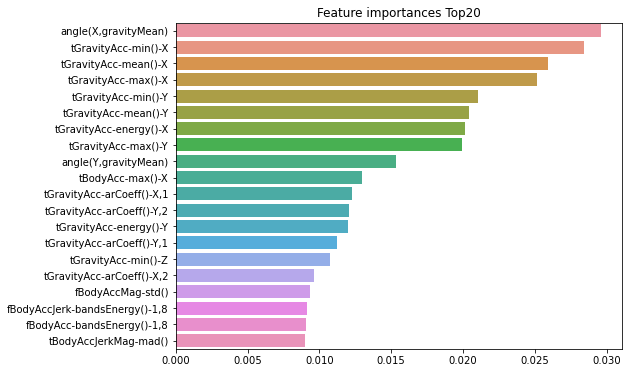

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()